In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Training Dataset 

In [80]:
train_data = pd.read_excel(r"Data_Train.xlsx")
pd.set_option('display.max_columns', None)
train_data

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [81]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [82]:
train_data.info()
# converting infos of all the columns in string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [83]:
train_data["Duration"].value_counts()
#to check how many flights have similar duration

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
27h 55m      1
41h 20m      1
37h 10m      1
4h 10m       1
32h 55m      1
Name: Duration, Length: 368, dtype: int64

In [84]:
train_data.dropna(inplace = True)
# to drop NULL values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Pre-processing Training Dataset

In [85]:
# Extracting day and month from Date_of_Journey to convert it into integer
train_data["Journey_day"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month  
0           24              3  
1            1              5  
2            9              6  
3           12              5  
4            1              3

In [86]:
# dropping Date_of_Journey column
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [87]:
# Extracting hours and minutes from Dep_Time to convert it into integers
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Dropping Dep_Time column
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [88]:
# Extracting hours and minutes from Arrival_Time to convert it into integers
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Dropping Arrival_Time column
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [89]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or minutes
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []

# Extracting hours and minutes from Duration
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))


# Adding duration_hours and duration_mins list to train_data dataframe
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

# Dropping Arrival_Time column
train_data.drop(["Duration"], axis = 1, inplace = True)

In [90]:
# Dropping Additional_Info column
train_data.drop(["Additional_Info"], axis = 1, inplace = True)

In [91]:
train_data

Airline    Source Destination                  Route Total_Stops  \
0           IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   
...            ...       ...         ...                    ...         ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    non-stop   
10679    Air India   Kolkata    Banglore              CCU → BLR    non-stop   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    non-stop   
10681      Vistara  Banglore   New Delhi              BLR → DEL    non-stop   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK     2 stops   

       Price  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0       3897           24              3        22       20             1   
1       7662            1              5         5       50            13   
2      13882            9              6         9       25             4   
3       6218           12              5        18        5            23   
4      13302            1              3        16       50            21   
...      ...          ...            ...       ...      ...           ...   
10678   4107            9              4        19       55            22   
10679   4145           27              4        20       45            23   
10680   7229           27              4         8       20            11   
10681  12648            1              3        11       30            14   
10682  11753            9              5        10       55            19   

       Arrival_min  Duration_hours  Duration_mins  
0               10               2             50  
1               15               7             25  
2               25              19              0  
3               30               5             25  
4               35               4             45  
...            ...             ...            ...  
10678           25               2             30  
10679           20               2             35  
10680           20               3              0  
10681           10               2             40  
10682           15               8             20  

[10682 rows x 14 columns]

# Categorizing Data

In [92]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [93]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [94]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

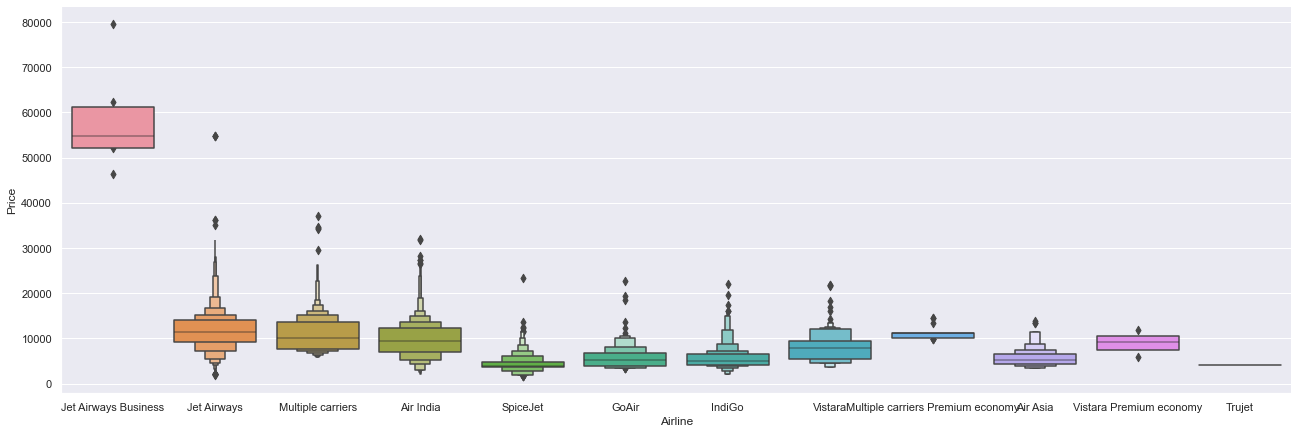

In [95]:
# Plotting Airline vs Price graph
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

As you can see from the graph, Jet Airways Bussiness has the highest price among all the other Airlines.

Other Airlines have almost same median.

In [96]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                      0              0               1                    0   
1                      1              0               0                    0   
2                      0              0               0                    1   
3                      0              0               1                    0   
4                      0              0               1                    0   
...                  ...            ...             ...                  ...   
10678                  0              0               0                    0   
10679                  1              0               0                    0   
10680                  0              0               0                    1   
10681                  0              0               0                    0   
10682                  1              0               0                    0   

       Airline_Jet Airways Business  Airline_Multiple carriers  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   
...                             ...                        ...   
10678                             0                          0   
10679                             0                          0   
10680                             0                          0   
10681                             0                          0   
10682                             0                          0   

       Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                              0                 0   
1                                              0                 0   
2                                              0                 0   
3                                              0                 0   
4                                              0                 0   
...                                          ...               ...   
10678                                          0                 0   
10679                                          0                 0   
10680                                          0                 0   
10681                                          0                 0   
10682                                          0                 0   

       Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0                   0                0                                0  
1                   0                0                                0  
2                   0                0                                0  
3                   0                0                                0  
4                   0                0                                0  
...               ...              ...                              ...  
10678               0                0                                0  
10679               0                0                                0  
10680               0                0                                0  
10681               0                1                                0  
10682               0                0                                0  

[10682 rows x 11 columns]

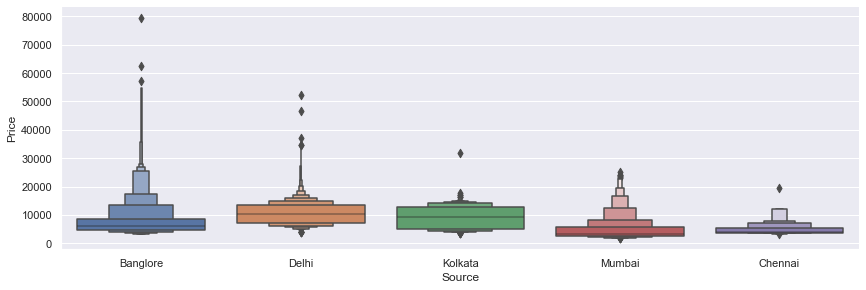

In [97]:
# Plotting Source vs Price graph
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

As you can see from the graph, median price of all the sources lie close in the graph

In [98]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0                   0             0               0              0
1                   0             0               1              0
2                   0             1               0              0
3                   0             0               1              0
4                   0             0               0              0
...               ...           ...             ...            ...
10678               0             0               1              0
10679               0             0               1              0
10680               0             0               0              0
10681               0             0               0              0
10682               0             1               0              0

[10682 rows x 4 columns]

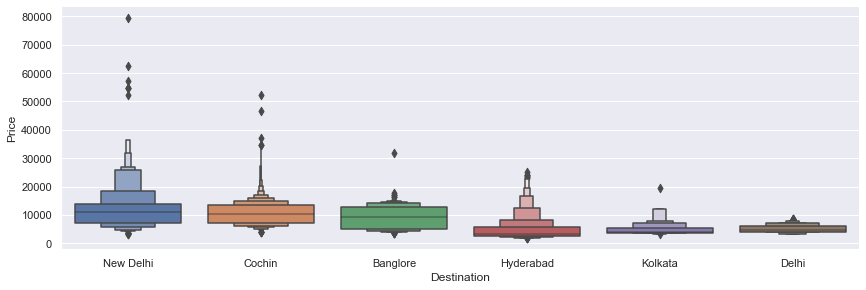

In [99]:
# Plotting Destination vs Price graph
sns.catplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

As you can see from the graph, median price of all the sources lie close in the graph

In [100]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                       0                  0                      0   
1                       0                  0                      0   
2                       1                  0                      0   
3                       0                  0                      0   
4                       0                  0                      0   
...                   ...                ...                    ...   
10678                   0                  0                      0   
10679                   0                  0                      0   
10680                   0                  1                      0   
10681                   0                  0                      0   
10682                   1                  0                      0   

       Destination_Kolkata  Destination_New Delhi  
0                        0                      1  
1                        0                      0  
2                        0                      0  
3                        0                      0  
4                        0                      1  
...                    ...                    ...  
10678                    0                      0  
10679                    0                      0  
10680                    0                      0  
10681                    0                      1  
10682                    0                      0  

[10682 rows x 5 columns]

In [101]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [102]:
# Dropping Route column as we have Total_Stops column present in the dataset
train_data.drop(["Route"], axis = 1, inplace = True)

In [103]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [104]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Values are assigned with corresponding integers
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [105]:
# Concatenating all the datasets
# train_data + Airline + Source + Destination
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

#As we have catogorized Airline, Source and Destination, we will drop these columns
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

# Pre-processed Training Dataset 

In [106]:
data_train

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0                0   3897           24              3        22       20   
1                2   7662            1              5         5       50   
2                2  13882            9              6         9       25   
3                1   6218           12              5        18        5   
4                1  13302            1              3        16       50   
...            ...    ...          ...            ...       ...      ...   
10678            0   4107            9              4        19       55   
10679            0   4145           27              4        20       45   
10680            0   7229           27              4         8       20   
10681            0  12648            1              3        11       30   
10682            2  11753            9              5        10       55   

       Arrival_hour  Arrival_min  Duration_hours  Duration_mins  \
0                 1           10               2             50   
1                13           15               7             25   
2                 4           25              19              0   
3                23           30               5             25   
4                21           35               4             45   
...             ...          ...             ...            ...   
10678            22           25               2             30   
10679            23           20               2             35   
10680            11           20               3              0   
10681            14           10               2             40   
10682            19           15               8             20   

       Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                      0              0               1                    0   
1                      1              0               0                    0   
2                      0              0               0                    1   
3                      0              0               1                    0   
4                      0              0               1                    0   
...                  ...            ...             ...                  ...   
10678                  0              0               0                    0   
10679                  1              0               0                    0   
10680                  0              0               0                    1   
10681                  0              0               0                    0   
10682                  1              0               0                    0   

       Airline_Jet Airways Business  Airline_Multiple carriers  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   
...                             ...                        ...   
10678                             0                          0   
10679                             0                          0   
10680                             0                          0   
10681                             0                          0   
10682                             0                          0   

       Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                              0                 0   
1                                              0                 0   
2                                              0                 0   
3                                              0                 0   
4                                              0                 0   
...                                          ...               ...   
10678                                        

# Test Dataset 

In [107]:
test_data = pd.read_excel(r"Test_set.xlsx")
test_data

Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20       4h      1 stop   
2     DEL → BOM → COK    19:15  19:00 22 May  23h 45m      1 stop   
3     DEL → BOM → COK    08:00         21:00      13h      1 stop   
4           BLR → DEL    23:55  02:45 25 Jun   2h 50m    non-stop   
...               ...      ...           ...      ...         ...   
2666  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667        CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                  Additional_Info  
0                         No info  
1                         No info  
2     In-flight meal not included  
3                         No info  
4                         No info  
...                           ...  
2666                      No info  
2667                      No info  
2668                      No info  
2669                      No info  
2670                      No info  

[2671 rows x 10 columns]

# Pre-processing Test Dataset
We will follow the same steps as Training Dataset

In [108]:
# Extracting day and month from Date_of_Journey to convert it into integer
#import pandas as pd
#test_data = pd.read_excel(r"Test_set.xlsx")
test_data["Journey_day"] = pd.to_datetime(test_data["Date_of_Journey"], format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

# dropping Date_of_Journey column
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Extracting hours and minutes from Dep_Time to convert it into integers
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute

# Dropping Dep_Time column
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Extracting hours and minutes from Arrival_Time to convert it into integers
test_data["Arrival_hour"] = pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Assigning and converting Duration column into list
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or minutes
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []

# Extracting hours and minutes from Duration
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))


# Adding duration_hours and duration_mins list to train_data dataframe
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins

# Dropping Arrival_Time column
test_data.drop(["Duration"], axis = 1, inplace = True)

# Dropping Additional_Info column
test_data.drop(["Additional_Info"], axis = 1, inplace = True)

test_data

Airline    Source Destination            Route Total_Stops  \
0           Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
1                IndiGo   Kolkata    Banglore  CCU → MAA → BLR      1 stop   
2           Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
3     Multiple carriers     Delhi      Cochin  DEL → BOM → COK      1 stop   
4              Air Asia  Banglore       Delhi        BLR → DEL    non-stop   
...                 ...       ...         ...              ...         ...   
2666          Air India   Kolkata    Banglore  CCU → DEL → BLR      1 stop   
2667             IndiGo   Kolkata    Banglore        CCU → BLR    non-stop   
2668        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
2669          Air India     Delhi      Cochin  DEL → BOM → COK      1 stop   
2670  Multiple carriers     Delhi      Cochin  DEL → BOM → COK      1 stop   

      Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0               6              6        17       30             4   
1              12              5         6       20            10   
2              21              5        19       15            19   
3              21              5         8        0            21   
4              24              6        23       55             2   
...           ...            ...       ...      ...           ...   
2666            6              6        20       30            20   
2667           27              3        14       20            16   
2668            6              3        21       50             4   
2669            6              3         4        0            19   
2670           15              6         4       55            19   

      Arrival_min  Duration_hours  Duration_mins  
0              25              10             55  
1              20               4              0  
2               0              23             45  
3               0              13              0  
4              45               2             50  
...           ...             ...            ...  
2666           25              23             55  
2667           55               2             35  
2668           25               6             35  
2669           15              15             15  
2670           15              14             20  

[2671 rows x 13 columns]

# Categorizing Data for Test Dataset

In [109]:
print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


In [110]:
print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [111]:
print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [112]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Values are assigned with corresponding integers
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenating all the datasets
# train_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

#As we have catogorized Airline, Source and Destination, we will drop these columns
data_test.drop(["Airline", "Source", "Destination", "Route"], axis = 1, inplace = True)

# Pre-processed Test Dataset

In [113]:
data_test

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  \
0               1            6              6        17       30   
1               1           12              5         6       20   
2               1           21              5        19       15   
3               1           21              5         8        0   
4               0           24              6        23       55   
...           ...          ...            ...       ...      ...   
2666            1            6              6        20       30   
2667            0           27              3        14       20   
2668            1            6              3        21       50   
2669            1            6              3         4        0   
2670            1           15              6         4       55   

      Arrival_hour  Arrival_min  Duration_hours  Duration_mins  Air India  \
0                4           25              10             55          0   
1               10           20               4              0          0   
2               19            0              23             45          0   
3               21            0              13              0          0   
4                2           45               2             50          0   
...            ...          ...             ...            ...        ...   
2666            20           25              23             55          1   
2667            16           55               2             35          0   
2668             4           25               6             35          0   
2669            19           15              15             15          1   
2670            19           15              14             20          0   

      GoAir  IndiGo  Jet Airways  Jet Airways Business  Multiple carriers  \
0         0       0            1                     0                  0   
1         0       1            0                     0                  0   
2         0       0            1                     0                  0   
3         0       0            0                     0                  1   
4         0       0            0                     0                  0   
...     ...     ...          ...                   ...                ...   
2666      0       0            0                     0                  0   
2667      0       1            0                     0                  0   
2668      0       0            1                     0                  0   
2669      0       0            0                     0                  0   
2670      0       0            0                     0                  1   

      Multiple carriers Premium economy  SpiceJet  Vistara  \
0                                     0         0        0   
1                                     0         0        0   
2                                     0         0        0   
3                                     0         0        0   
4                                     0         0        0   
...                                 ...       ...      ...   
2666                                  0         0        0   
2667                                  0         0        0   
2668                                  0         0        0   
2669                                  0         0        0   
2670                                  0         0        0   

      Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  Delhi  \
0                           0        0      1        0       0       1      0   
1                           0        0      0        1       0       0      0   
2                           0        0      1        0       0       1      0   
3                           0        0      1        0       0       1      0   
4                           0        0      0        0       0       0      1   
...                       ...      ...    ...      ...     ...     ...    ...   
2666                       

# Feature Selection

In [114]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [115]:

X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  \
0                0           24              3        22       20   
1                2            1              5         5       50   
2                2            9              6         9       25   
3                1           12              5        18        5   
4                1            1              3        16       50   
...            ...          ...            ...       ...      ...   
10678            0            9              4        19       55   
10679            0           27              4        20       45   
10680            0           27              4         8       20   
10681            0            1              3        11       30   
10682            2            9              5        10       55   

       Arrival_hour  Arrival_min  Duration_hours  Duration_mins  \
0                 1           10               2             50   
1                13           15               7             25   
2                 4           25              19              0   
3                23           30               5             25   
4                21           35               4             45   
...             ...          ...             ...            ...   
10678            22           25               2             30   
10679            23           20               2             35   
10680            11           20               3              0   
10681            14           10               2             40   
10682            19           15               8             20   

       Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                      0              0               1                    0   
1                      1              0               0                    0   
2                      0              0               0                    1   
3                      0              0               1                    0   
4                      0              0               1                    0   
...                  ...            ...             ...                  ...   
10678                  0              0               0                    0   
10679                  1              0               0                    0   
10680                  0              0               0                    1   
10681                  0              0               0                    0   
10682                  1              0               0                    0   

       Airline_Jet Airways Business  Airline_Multiple carriers  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   
...                             ...                        ...   
10678                             0                          0   
10679                             0                          0   
10680                             0                          0   
10681                             0                          0   
10682                             0                          0   

       Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                              0                 0   
1                                              0                 0   
2                                              0                 0   
3                                              0                 0   
4                                              0                 0   
...                                          ...               ...   
10678                                          0                 0   
10679                                          0           

In [116]:
y = data_train.iloc[:, 1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

### Univariate Selection
Using SelectKBest from scikit-learn library

In [117]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                              Specs         Score
4                           Dep_min  68390.275588
7                    Duration_hours  58838.743182
6                       Arrival_min  50443.549342
8                     Duration_mins  44466.489819
1                       Journey_day  22598.862492
5                      Arrival_hour  18959.283050
3                          Dep_hour  11058.307000
17                   Airline_Trujet  10681.000000
19  Airline_Vistara Premium economy  10679.000000
13     Airline_Jet Airways Business  10676.000000


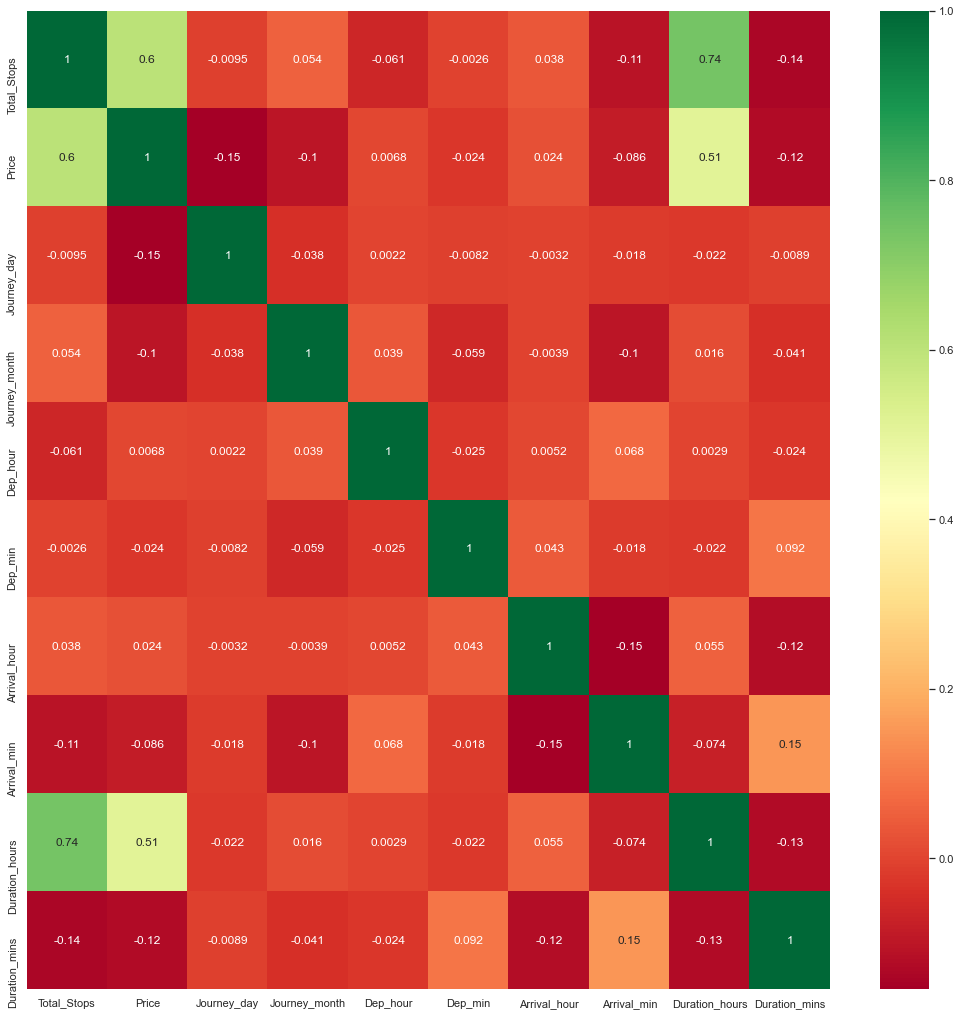

In [118]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [119]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [120]:
print(selection.feature_importances_)

[2.24997426e-01 1.43663198e-01 5.31811566e-02 2.39738237e-02
 2.14295607e-02 2.77459647e-02 1.89681190e-02 1.18895776e-01
 1.77609055e-02 9.45790292e-03 1.94445958e-03 1.96713813e-02
 1.40431479e-01 6.71221696e-02 1.88652807e-02 8.58954021e-04
 3.45327134e-03 9.78227337e-05 5.01709719e-03 7.65893048e-05
 3.55628547e-04 9.13814713e-03 3.44842387e-03 9.42546253e-03
 9.01395694e-03 1.90592030e-02 6.73359958e-03 5.68329860e-04
 2.46449111e-02]


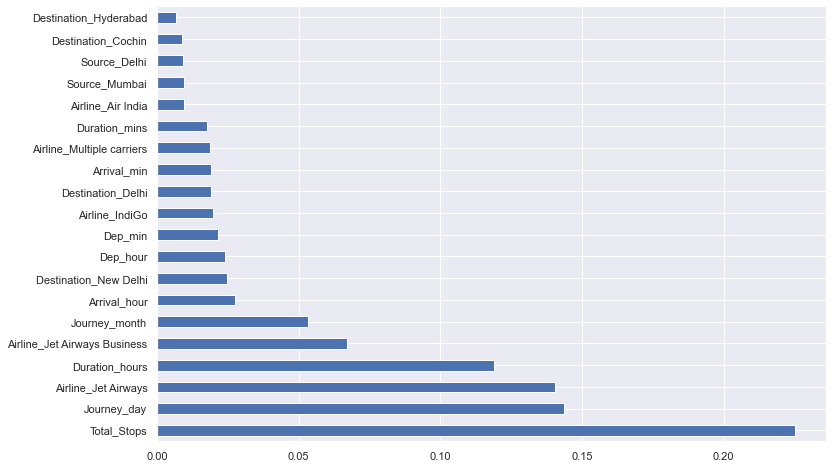

In [121]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Decision Tree

In [127]:
from numpy import log2 as log
eps = np.finfo(float).eps

#Finding entropy of the entire dataset
def find_entropy(dataset):
    Class = data_train.keys()[-1]
    entropy = 0
    values = dataset[Class].unique()
    for value in values:
        fraction = dataset[Class].value_counts()[value]/len(dataset[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy 

#Finding entropy of individual attributes
def find_entropy_attribute(dataset, attribute):
    Class = dataset.keys()[-1]
    target_variables = dataset[Class].unique()
    variables = dataset[attribute].unique()
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(dataset[attribute][dataset[attribute]==variable][dataset[Class]==target_variable])
            den = len(dataset[attribute][dataset[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(dataset)
        entropy2 += -fraction2*entropy
    return abs(entropy2)

def find_winner(dataset):
    Entropy_att = []
    IG = []
    for key in dataset.keys()[:-1]:
        IG.append(find_entropy(dataset)-find_entropy_attribute(dataset,key))
    return dataset.keys()[:-1][np.argmax(IG)]

def get_subtable(dataset, node,value):
    return dataset[dataset[node] == value].reset_index(drop=True)

def buildTree(dataset,tree=None):
    Class = dataset.keys()[-1]
    node = find_winner(dataset)
    attValue = np.unique(dataset[node])
    if tree is None:
        tree={}
        tree[node] = {}
    for value in attValue:
        subtable = get_subtable(dataset,node,value)
        clValue,counts = np.unique(subtable['death'],return_counts=True)
        if len(counts)==1:
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable)
    return tree

#Training on 0.1% of dataset
# train, test = train_test_split(df, train_size = 0.1, random_state = 42, shuffle=True)
t = buildTree(data_train)
pprint.pprint(t)

KeyError: 'death'